In [5]:
import numpy as np
class Autoencoder:
    def __init__(self,X,hidden_dim):
        self.input_dim = X.shape[0]
        self.hidden_dim = hidden_dim
        self.output_dim = X.shape[0]
        self.weights_input_hidden = np.random.randn(self.hidden_dim,self.input_dim)*np.sqrt(1/self.input_dim)
        
        # *np.sqrt(2/self.layer_sizes[i]))
        self.weights_hidden_output = np.random.randn(self.output_dim,self.hidden_dim)*np.sqrt(1/self.hidden_dim)
        
        self.bias_input_hidden=np.zeros((self.hidden_dim,1))
        self.bias_hidden_output=np.zeros((self.output_dim,1))
        
    def sigmoid(self,z):
         
        return 1/(1+np.exp(-z))
    
    def sigmoid_derivative(self,a):
        return a*(1-a)
    
    def lossfunction(self,a,X):
        
        return np.mean((a - X) ** 2)
    
    
        
    def forward(self,X):
        
        z1=self.weights_input_hidden@X+self.bias_input_hidden
        a1=self.sigmoid(z1)
        z2=self.weights_hidden_output@a1+self.bias_hidden_output
        a2=self.sigmoid(z2)
        
        return z1,a1,z2,a2
    
    def derivative_sigmoid(self,z): 
        
        return z*(1-z)
    
    def derivative_lossfunction(self,a,X):
        return 2*(a-X)

    def backward(self,X,a2,z2,a1,z1):
        
        da2=self.derivative_lossfunction(a2,X)
        dz2=self.derivative_sigmoid(a2)*da2
        
        dw2=dz2@a1.T/self.input_dim
        db2=np.sum(dz2,axis=1,keepdims=True)/self.input_dim
        da1=self.weights_hidden_output.T@dz2
        dz1=self.derivative_sigmoid(a1)*da1
         
        dw1=dz1@X.T/self.input_dim
        db1=np.sum(dz1,axis=1,keepdims=True)/self.input_dim
        
        
        return dw1,db1,dw2,db2
    
    
    def update_weights(self, learning_rate, dw1, db1, dw2, db2):
      
        self.weights_input_hidden -= learning_rate * dw1
        self.bias_input_hidden -= learning_rate * db1
        self.weights_hidden_output -= learning_rate * dw2
        self.bias_hidden_output -= learning_rate * db2
        

            
    def train(self,X,epochs,learning_rate):
        for i in range(epochs):
            z1,a1,z2,a2=self.forward(X)
            dw1,db1,dw2,db2=self.backward(X,a2,z2,a1,z1)
            self.update_weights(learning_rate,dw1,db1,dw2,db2)
            if i % 10 == 0:
                print(f"Epoch {i} loss: {self.lossfunction(a2,X)}")
            
            
            
            
    def predict(self,X):
        z1,a1,z2,a2=self.forward(X)
        return a2


In [6]:
from sklearn.datasets import fetch_openml
import numpy as np

# Load MNIST
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.values / 255.0  # Normalize to [0,1]
X = X.T  # Now shape is (784, num_samples)


In [10]:

autoencoder = Autoencoder(X, 32)

print("Before:", autoencoder.weights_input_hidden[0, :5])
autoencoder.train(X, 100, 0.01)
print("After:", autoencoder.weights_input_hidden[0, :5])

reconstructions = autoencoder.predict(X)






Before: [ 0.04757287 -0.02392963 -0.04869152 -0.02122652  0.02607368]
Any NaN in dw1? False
dw1 mean: 4.1519432004632275 db1 mean: 31.947363212552887
Any NaN in dw2? False
dw2 mean: 7.843340720699387 db2 mean: 15.60358218748896
Epoch 0 loss: 0.2504835332778376
Any NaN in dw1? False
dw1 mean: -1.1072040715767602 db1 mean: -10.811556050879187
Any NaN in dw2? False
dw2 mean: 0.5594969406758807 db2 mean: 13.037753610929336
Any NaN in dw1? False
dw1 mean: -0.41380467152216727 db1 mean: -3.841626414416158
Any NaN in dw2? False
dw2 mean: 0.9814149869903422 db2 mean: 4.379970346423845
Any NaN in dw1? False
dw1 mean: -0.01315987217015476 db1 mean: -0.19156120271602778
Any NaN in dw2? False
dw2 mean: 0.3414341508342523 db2 mean: 1.2162485876663036
Any NaN in dw1? False
dw1 mean: -0.013746105152512924 db1 mean: -0.18889348280015766
Any NaN in dw2? False
dw2 mean: 0.2196007435842661 db2 mean: 0.7809038558802837
Any NaN in dw1? False
dw1 mean: -0.012938924559827118 db1 mean: -0.17980408476992074
An

In [13]:
import numpy as np
class Autoencoder_with_cross_entropy:
    def __init__(self,X,hidden_dim):
        self.input_dim = X.shape[0]
        self.hidden_dim = hidden_dim
        self.output_dim = X.shape[0]
        self.weights_input_hidden = np.random.randn(self.hidden_dim,self.input_dim)*np.sqrt(1/self.input_dim)
        
        # *np.sqrt(2/self.layer_sizes[i]))
        self.weights_hidden_output = np.random.randn(self.output_dim,self.hidden_dim)*np.sqrt(1/self.hidden_dim)
        
        self.bias_input_hidden=np.zeros((self.hidden_dim,1))
        self.bias_hidden_output=np.zeros((self.output_dim,1))
        
    def sigmoid(self,z):
         
        return 1/(1+np.exp(-z))
    
    def sigmoid_derivative(self,a):
        return a*(1-a)
    
    def lossfunction(self,a,X):
        
        eps = 1e-10
        return -np.mean(X*np.log(a + eps)+(1-X)*np.log(1-a + eps))

    
        
    def forward(self,X):
        
        z1=self.weights_input_hidden@X+self.bias_input_hidden
        a1=self.sigmoid(z1)
        z2=self.weights_hidden_output@a1+self.bias_hidden_output
        a2=self.sigmoid(z2)
        
        return z1,a1,z2,a2
    
    def derivative_sigmoid(self,z): 
        
        return z*(1-z)
    
    def derivative_lossfunction(self,a,X):
        return -X/a+(1-X)/(1-a)

    def backward(self,X,a2,z2,a1,z1):
        
        da2=self.derivative_lossfunction(a2,X)
        dz2=self.derivative_sigmoid(a2)*da2
        
        dw2=dz2@a1.T/self.input_dim
        db2=np.sum(dz2,axis=1,keepdims=True)/self.input_dim
        da1=self.weights_hidden_output.T@dz2
        dz1=self.derivative_sigmoid(a1)*da1
         
        dw1=dz1@X.T/self.input_dim
        db1=np.sum(dz1,axis=1,keepdims=True)/self.input_dim
        
        
        return dw1,db1,dw2,db2
    
    
    def update_weights(self, learning_rate, dw1, db1, dw2, db2):
      
        self.weights_input_hidden -= learning_rate * dw1
        self.bias_input_hidden -= learning_rate * db1
        self.weights_hidden_output -= learning_rate * dw2
        self.bias_hidden_output -= learning_rate * db2
        

            
    def train(self,X,epochs,learning_rate):
        for i in range(epochs):
            z1,a1,z2,a2=self.forward(X)
            dw1,db1,dw2,db2=self.backward(X,a2,z2,a1,z1)
            self.update_weights(learning_rate,dw1,db1,dw2,db2)
            if i % 10 == 0:
                print(f"Epoch {i} loss: {self.lossfunction(a2,X)}")
            
            
            
            
    def predict(self,X):
        z1,a1,z2,a2=self.forward(X)
        return a2


In [ ]:
# Create and train the autoencoder
autoencoder = Autoencoder_with_cross_entropy(X, hidden_dim=128)
autoencoder.train(X, epochs=100, learning_rate=0.01)



Epoch 0 loss: 0.7102743283427565
Epoch 10 loss: 0.29497252032317467
Epoch 20 loss: 0.2826148317508592
Epoch 30 loss: 0.2627337695162371
Epoch 40 loss: 0.2500140217374731
Epoch 50 loss: 0.23472935841457543
Epoch 60 loss: 0.23173628735247917
Epoch 70 loss: 0.21203406990563944
Epoch 80 loss: 0.20379724732261695
Epoch 90 loss: 0.20160699554035705


NameError: name 'X_train' is not defined

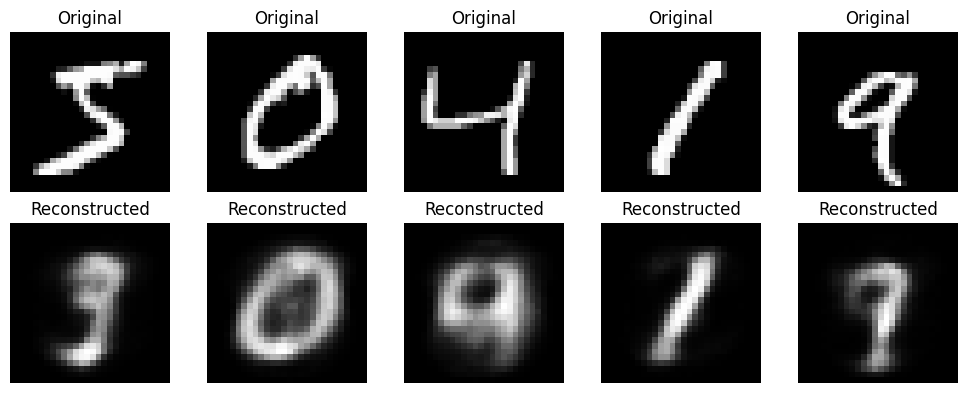

In [26]:

# Get reconstructions
import matplotlib.pyplot as plt
reconstructions = autoencoder.predict(X)

plt.figure(figsize=(10, 4))
for i in range(5):
    # Original image
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[:,i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    # Reconstructed image
    plt.subplot(2, 5, i + 6)
    plt.imshow(reconstructions[:,i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [25]:
print(X.shape)
print(reconstructions.shape)

(784, 70000)
(784, 70000)


In [27]:
# Create and train the autoencoder
autoencoder = Autoencoder_with_cross_entropy(X, hidden_dim=32)
autoencoder.train(X, epochs=300, learning_rate=0.01)



Epoch 0 loss: 0.7295390393871528
Epoch 10 loss: 0.2685354109734805
Epoch 20 loss: 0.25902589853789654
Epoch 30 loss: 0.25560969694727337
Epoch 40 loss: 0.2516062447416587
Epoch 50 loss: 0.2488585053866612
Epoch 60 loss: 0.24626086429418922
Epoch 70 loss: 0.24084072433206355
Epoch 80 loss: 0.23780627410764668
Epoch 90 loss: 0.23495225028129113
Epoch 100 loss: 0.23353030003437178
Epoch 110 loss: 0.23273625116051685
Epoch 120 loss: 0.231557586028807
Epoch 130 loss: 0.23095608839154486
Epoch 140 loss: 0.23123679305229602
Epoch 150 loss: 0.22992506910949434
Epoch 160 loss: 0.2294278536717855
Epoch 170 loss: 0.2301572151756355
Epoch 180 loss: 0.2291933282111555
Epoch 190 loss: 0.2302967528741766
Epoch 200 loss: 0.22845731021676016
Epoch 210 loss: 0.22638253981654502
Epoch 220 loss: 0.2258554147732441
Epoch 230 loss: 0.22374117314074046


KeyboardInterrupt: 

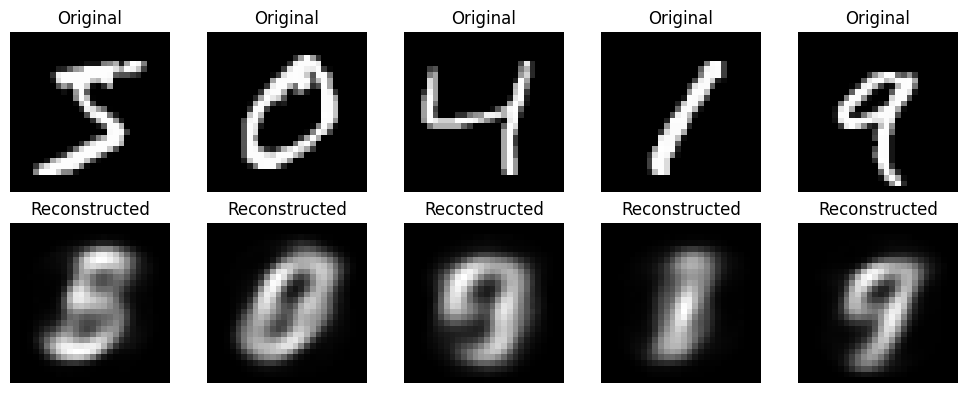

In [28]:

# Get reconstructions
import matplotlib.pyplot as plt
reconstructions = autoencoder.predict(X)

plt.figure(figsize=(10, 4))
for i in range(5):
    # Original image
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[:,i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    # Reconstructed image
    plt.subplot(2, 5, i + 6)
    plt.imshow(reconstructions[:,i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [33]:
import numpy as np
class Autoencoder_with_cross_entropy_with_weight_tying:
    def __init__(self,X,hidden_dim):
        self.input_dim = X.shape[0]
        self.hidden_dim = hidden_dim
        self.output_dim = X.shape[0]
        self.weights_input_hidden = np.random.randn(self.hidden_dim,self.input_dim)*np.sqrt(1/self.input_dim)
        
        # *np.sqrt(2/self.layer_sizes[i]))
        
        
        self.bias_input_hidden=np.zeros((self.hidden_dim,1))
        self.bias_hidden_output=np.zeros((self.output_dim,1))
        
    def sigmoid(self,z):
         
        return 1/(1+np.exp(-z))
    
    def sigmoid_derivative(self,a):
        return a*(1-a)
    
    def lossfunction(self,a,X):
        
        eps = 1e-10
        return -np.mean(X*np.log(a + eps)+(1-X)*np.log(1-a + eps))

    
        
    def forward(self,X):
        
        z1=self.weights_input_hidden@X+self.bias_input_hidden
        a1=self.sigmoid(z1)
        z2=self.weights_input_hidden.T@a1+self.bias_hidden_output
        a2=self.sigmoid(z2)
        
        return z1,a1,z2,a2
    
    def derivative_sigmoid(self,z): 
        
        return z*(1-z)
    
    def derivative_lossfunction(self,a,X):
        return -X/a+(1-X)/(1-a)

    def backward(self,X,a2,z2,a1,z1):
        
        da2=self.derivative_lossfunction(a2,X)
        dz2=self.derivative_sigmoid(a2)*da2
        
        dw2=dz2@a1.T/self.input_dim
        db2=np.sum(dz2,axis=1,keepdims=True)/self.input_dim
        da1=self.weights_input_hidden@dz2
        dz1=self.derivative_sigmoid(a1)*da1
         
        dw1=dz1@X.T/self.input_dim
        db1=np.sum(dz1,axis=1,keepdims=True)/self.input_dim
        
        
        return dw1,db1,dw2,db2
    
    
    def update_weights(self, learning_rate, dw1, db1, dw2, db2):
      
        self.weights_input_hidden -= learning_rate * (dw1+dw2.T)
        self.bias_input_hidden -= learning_rate * db1
        
        self.bias_hidden_output -= learning_rate * db2
        

            
    def train(self,X,epochs,learning_rate):
        for i in range(epochs):
            z1,a1,z2,a2=self.forward(X)
            dw1,db1,dw2,db2=self.backward(X,a2,z2,a1,z1)
            self.update_weights(learning_rate,dw1,db1,dw2,db2)
            if i % 10 == 0:
                print(f"Epoch {i} loss: {self.lossfunction(a2,X)}")
            
            
            
            
    def predict(self,X):
        z1,a1,z2,a2=self.forward(X)
        return a2


In [35]:
# Create and train the autoencoder
autoencoder = Autoencoder_with_cross_entropy_with_weight_tying(X, hidden_dim=32)
autoencoder.train(X, epochs=100, learning_rate=0.01)



Epoch 0 loss: 0.692521513830013
Epoch 10 loss: 0.2511172377610005
Epoch 20 loss: 0.2277268560205161
Epoch 30 loss: 0.21394755178443137
Epoch 40 loss: 0.20376082250808347
Epoch 50 loss: 0.19699320247922175
Epoch 60 loss: 0.19203530798363697
Epoch 70 loss: 0.1882172993593307
Epoch 80 loss: 0.18486854573642297
Epoch 90 loss: 0.1819610169291478


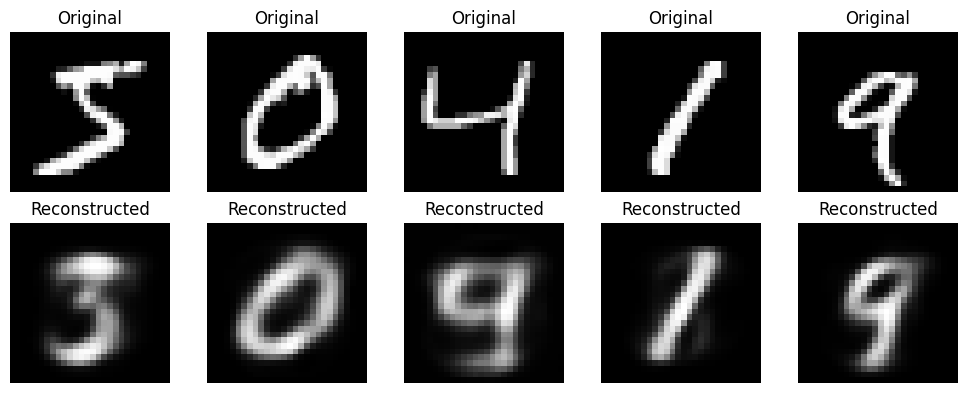

In [67]:
reconstructions_with_weight_tying = autoencoder.predict(X)

plt.figure(figsize=(10, 4))
for i in range(5):
    # Original image
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[:,i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    # Reconstructed image
    plt.subplot(2, 5, i + 6)
    plt.imshow(reconstructions_with_weight_tying[:,i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()

